In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Read data
df = pd.read_csv('data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
print(df.shape)
print(df['Class'].value_counts())

(284807, 31)
Class
0    284315
1       492
Name: count, dtype: int64


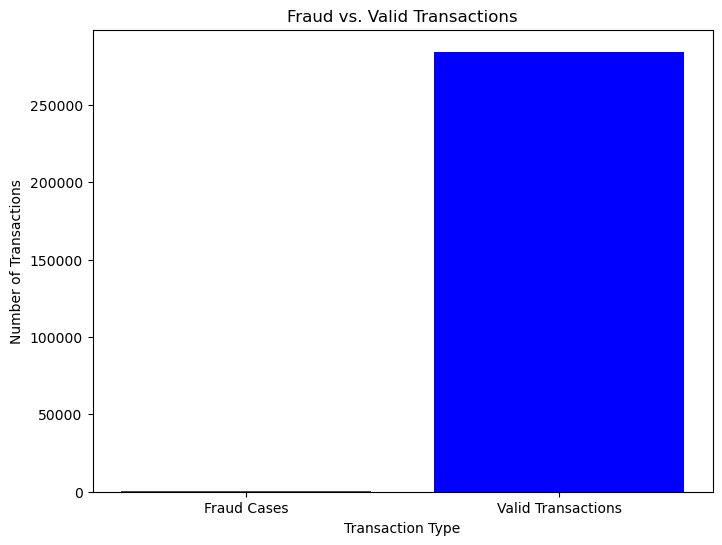

In [20]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]

# Plotting the bar chart
labels = ['Fraud Cases', 'Valid Transactions']
values = [len(fraud), len(valid)]
colors = ['red', 'blue']

plt.figure(figsize=(8,6))
plt.bar(labels, values, color=colors)
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.title('Fraud vs. Valid Transactions')
plt.show()

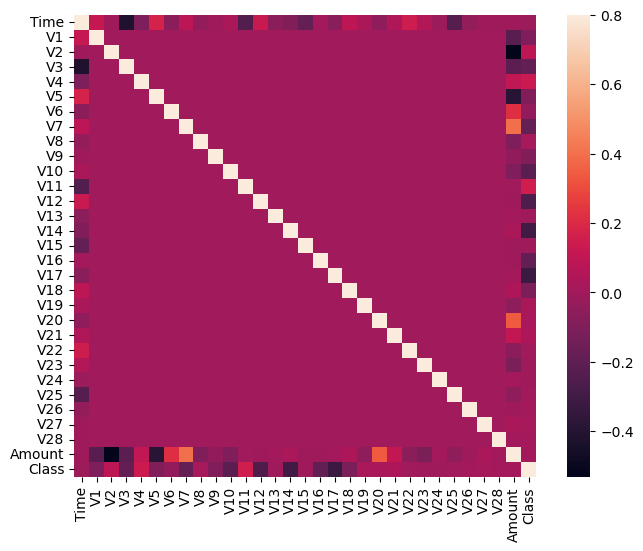

In [19]:
# Create heatmap to check correlation
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), vmax=0.8, square=True)
plt.show()

Most of the features do not correlate to other ones but there are some features that either has a positive or negative correlation with each other.

In [23]:
# Get data
X = df.drop('Class', axis=1)
y = df['Class']
print('X shape: ', X.shape)
print('y shape: ', y.shape)

# Get values
X_data = X.values
y_data = y.values

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

X shape:  (284807, 30)
y shape:  (284807,)


In [24]:
# Model development
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



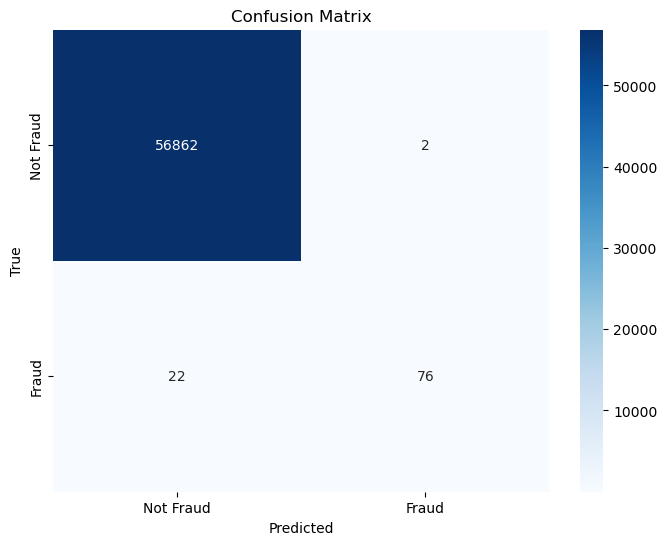

In [26]:
# Classification report
print('Classification report: ')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Fraud', 'Fraud']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, xticklabels=labels, yticklabels=labels,
            annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Reference

https://www.geeksforgeeks.org/ml-credit-card-fraud-detection/?ref=lbp